# Netflix

In [35]:
#import libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [36]:
#load dataset
df_netflix= pd.read_csv('Netflix.csv')
df_netflix.head()


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


(7789, 11)
['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']
Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object
  Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. 

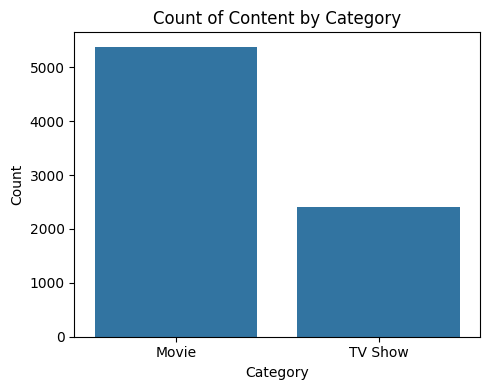

In [37]:
# This cell loads the Netflix dataset, inspects its structure, and shows a quick preview for orientation.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV with provided encoding


# Standardize column names (strip spaces)
df_netflix.columns = [c.strip() for c in df_netflix.columns]

# Show basic shape, columns, dtypes, and head for a quick glance
print(df_netflix.shape)
print(list(df_netflix.columns))
print(df_netflix.dtypes)
print(df_netflix.head())

# Quick ack
print('Loaded dataset and displayed basic info and head')

# Display a simple countplot of Category to visually inspect balance
plt.figure(figsize=(5,4))
sns.countplot(data=df_netflix, x='Category', order=df_netflix['Category'].value_counts().index)
plt.title('Count of Content by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Category
Movie      5374
TV Show    2398
Name: count, dtype: int64


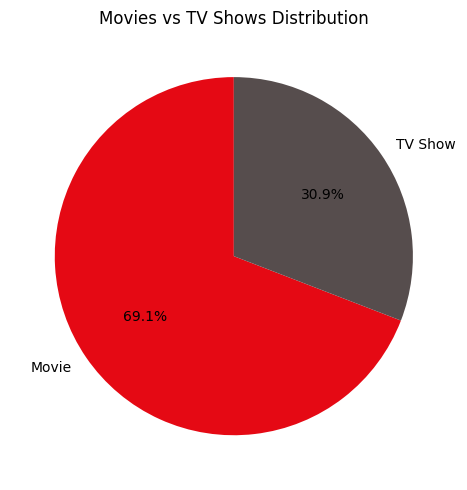

Counted and visualized Movies vs TV Shows distribution


In [38]:
# Step 2: Movies vs TV Shows Analysis - count, visualize, and year-wise trend
# Count total Movies vs TV Shows
category_counts = df['Category'].value_counts()
print(category_counts)

# Visualize with a pie chart
plt.figure(figsize=(6,5))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=['#E50914','#564d4d'])
plt.title('Movies vs TV Shows Distribution')
plt.tight_layout()
plt.show()

print('Counted and visualized Movies vs TV Shows distribution')

In [39]:
# Year-wise trend of Movies and TV Shows using line and bar charts
# Filter out rows with missing Year
df_year = df[df['Year'].notna()].copy()

# Group by Year and Category
year_category = df_year.groupby(['Year', 'Category']).size().unstack(fill_value=0)

# Line chart showing trend over years
plt.figure(figsize=(12,5))
year_category.plot(kind='line', marker='o', color=['#E50914','#564d4d'], linewidth=2)
plt.title('Year-wise Trend: Movies vs TV Shows')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.legend(title='Category')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print('Displayed year-wise line trend for Movies vs TV Shows')

KeyError: 'Year'

In [40]:
# Bar chart showing year-wise counts stacked for Movies vs TV Shows
plt.figure(figsize=(12,5))
year_category.plot(kind='bar', stacked=False, color=['#E50914','#564d4d'], width=0.8)
plt.title('Year-wise Count: Movies vs TV Shows (Bar Chart)')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('Displayed year-wise bar chart for Movies vs TV Shows')

NameError: name 'year_category' is not defined

<Figure size 1200x500 with 0 Axes>

                      Genre  Count
0      International Movies   2437
1                    Dramas   2107
2                  Comedies   1472
3    International TV Shows   1197
4             Documentaries    786
5        Action & Adventure    721
6                 TV Dramas    703
7        Independent Movies    675
8  Children & Family Movies    532
9           Romantic Movies    531


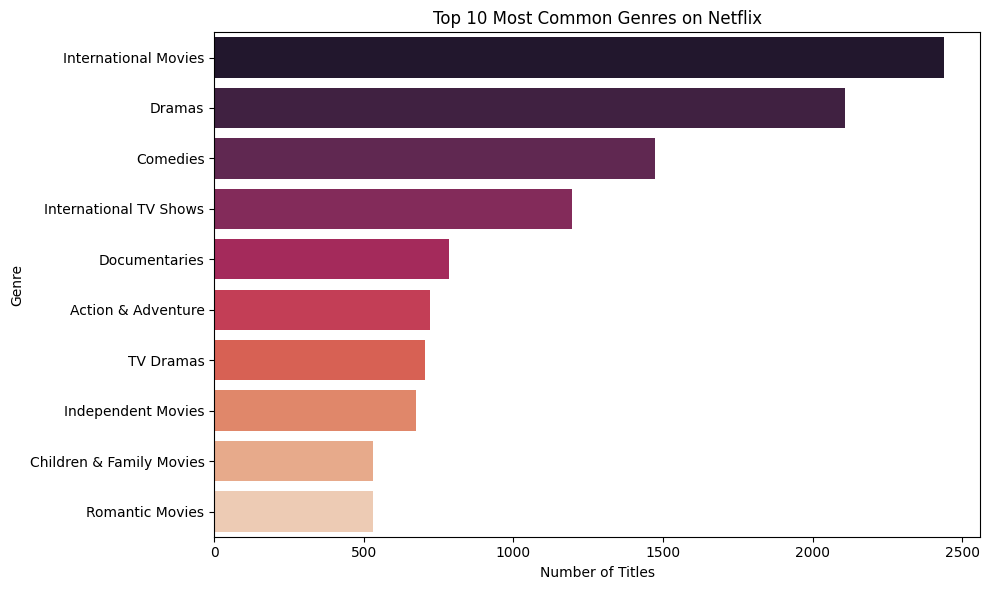

Analyzed and visualized top 10 genres


In [41]:
# Step 3: Genre (Type) Analysis - find most common genres from Type column
# The Type column contains comma-separated genres; we'll split and count them
from collections import Counter

# Extract all genres by splitting the Type column
all_genres = []
for types in df['Type'].dropna():
    genres = [g.strip() for g in str(types).split(',')]
    all_genres.extend(genres)

# Count genre frequencies
genre_counts = Counter(all_genres)
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

print(top_genres)

# Visualize top 10 genres
plt.figure(figsize=(10,6))
sns.barplot(data=top_genres, x='Count', y='Genre', palette='rocket')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

print('Analyzed and visualized top 10 genres')